# Finite size scaling

In this notebook we will discuss the use of a finite size scaling ansatz to measure properties of a percolating system. So far we've treated the finite systems as if they were in reality infinte.

We will start by finding the percolation threshold $p_{\Pi = x}$ for which the percolation probability $\Pi(p_{\Pi = x}) = x$. That is, we generate many systems of size $L$ with a specific probability $p$ and compute the average percolation probability. We improve on our choice of $p$ until we reach a point where $\Pi(p) \approx x$. The value of $p$ at this point will be $p_{\Pi = x}$.

In [1]:
import numpy as np
import scipy.optimize
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from percolation import compute_percolation_threshold, compute_percolation_probability
import sklearn.linear_model

In [2]:
sns.set(color_codes=True)

In [3]:
L_list = [25, 50, 100, 200, 400, 800]
M = 100

x_high = 0.8
x_low = 0.3

p_pi_high = []
p_pi_low = []

In [4]:
for L in tqdm.tqdm_notebook(L_list):
    p_pi = compute_percolation_threshold(x_high, L, M, p_bounds=(0, 1))
    print(f"(high) p = {p_pi}")
    p_pi_high.append(p_pi)

    p_pi = compute_percolation_threshold(x_low, L, M, p_bounds=(0, 1))
    p_pi_low.append(p_pi)
    print(f"(low) p = {p_pi}")

(high) p = 0.6093978881835938
(low) p = 0.5481948852539062
(high) p = 0.5994186401367188
(low) p = 0.5694656372070312
(high) p = 0.5993118286132812
(low) p = 0.5761032104492188
(high) p = 0.5969009399414062
(low) p = 0.5837020874023438
(high) p = 0.5949020385742188
(low) p = 0.5875167846679688
(high) p = 0.5938339233398438
(low) p = 0.5895919799804688



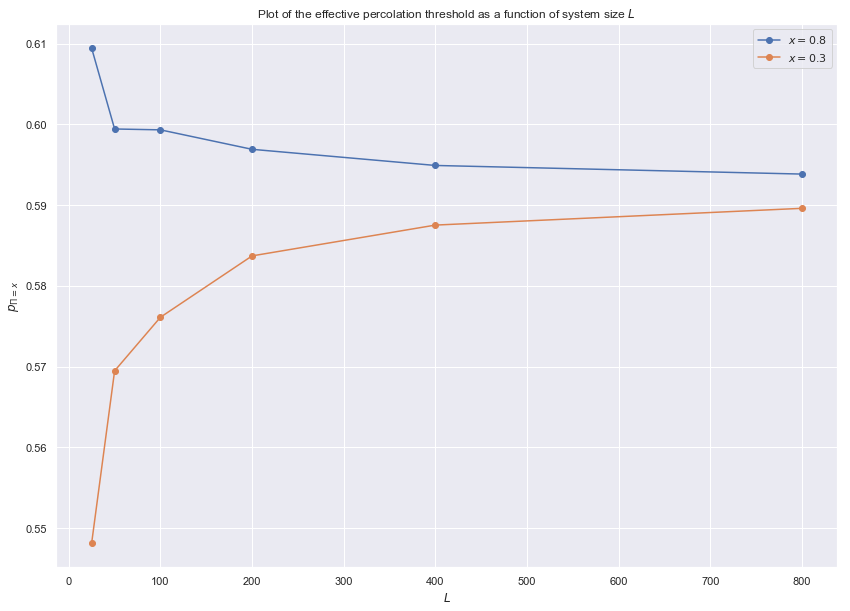

In [5]:
fig = plt.figure(figsize=(14, 10))

plt.plot(L_list, p_pi_high, label=fr"$x = {x_high}$", marker="o")
plt.plot(L_list, p_pi_low, label=fr"$x = {x_low}$", marker="o")
plt.legend(loc="best")
plt.xlabel(r"$L$")
plt.ylabel(r"$p_{\Pi = x}$")
plt.title(r"Plot of the effective percolation threshold as a function of system size $L$")
plt.show()

## Scaling as a function of system size

We know that the scaling theory for the percolation threshold can be found from
\begin{align}
    p_{\Pi = \Delta x}
    \equiv
    p_{\Pi = x_1} - p_{\Pi = x_2}
    = \left( C_{x_1} - C_{x_2} \right) L^{-1 / \nu}.
\end{align}
Taking the logarithm on both sides, we can compute an estimate for the exponent $-1 / \nu$.
\begin{align}
    \log\left( p_{\Pi = \Delta x} \right)
    = \log \left( C_{x_1} - C_{x_2} \right)
    - \frac{1}{\nu}\log\left( L \right).
\end{align}

In [6]:
p_diff = np.array(p_pi_high) - np.array(p_pi_low)
L_arr = np.array(L_list)

Below we do linear regression to find an estimate for the exponent $\nu$.

In [7]:
log_p_diff = np.log(p_diff)
log_L_arr = np.log(L_arr)

clf = sklearn.linear_model.LinearRegression().fit(
    log_L_arr[:, np.newaxis], log_p_diff[:, np.newaxis]
)

neg_inv_nu = clf.coef_[0, 0]
log_C_diff = clf.intercept_[0]

In [8]:
nu = -1 / neg_inv_nu

print(f"nu = {nu}")

nu = 1.3395479342334302


The true value of $\nu$ for $2$ dimensions is $\nu = 4 / 3 \approx 1.3333$.

In [9]:
nu_true = 4 / 3

print(f"Diff in nu from true value: {np.abs(nu_true - nu)}")

Diff in nu from true value: 0.006214600900096956


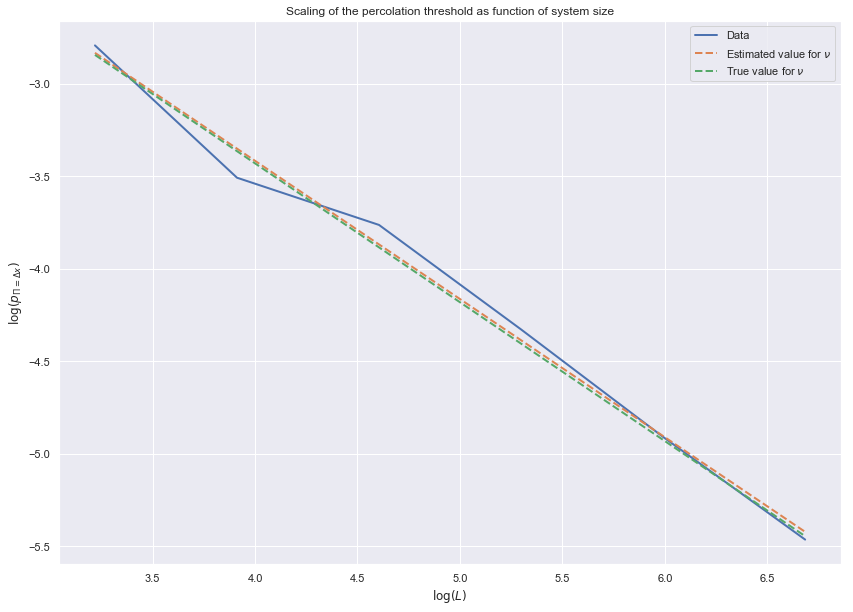

In [10]:
plt.figure(figsize=(14, 10))

plt.plot(
    log_L_arr,
    log_p_diff,
    lw=2,
    label=r"Data"
)
plt.plot(
    log_L_arr,
    log_C_diff + neg_inv_nu * log_L_arr,
    "--",
    lw=2,
    label=r"Estimated value for $\nu$"
)
plt.plot(
    log_L_arr,
    log_C_diff - 1 / nu_true * log_L_arr,
    "--",
    lw=2,
    label=r"True value for $\nu$"
)
plt.legend(loc="best")
plt.title(r"Scaling of the percolation threshold as function of system size")
plt.xlabel(r"$\log(L)$")
plt.ylabel(r"$\log(p_{\Pi = \Delta x})$")
plt.show()

Here we have plotted the computed values for the scaling of the difference between two percolation thresholds, versus the theoretical model using both the estimated value for $\nu$ and the "true" value. We see that the values are pretty close.

## Estimating the critical percolation probability

Using scaling theory from the percolation threshold, we can estimate the critical percolation probability $p_c$ by
\begin{align}
    p_{\Pi = x} = p_c + C_x L^{-1 / \nu},
\end{align}

where $\nu = 4 / 3$ is the exact known value. Again we use linear regression to estimate the coefficient $C_x$ and the intercept, i.e., the critical percolation probability, $p_c$.

In [11]:
p_pi_high_arr = np.array(p_pi_high)
p_pi_low_arr = np.array(p_pi_low)

In [12]:
clf_high = sklearn.linear_model.LinearRegression().fit(
    L_arr[:, np.newaxis] ** (-1 / nu_true),
    p_pi_high_arr[:, np.newaxis]
)

C_x_high = clf_high.coef_[0, 0]
p_c_high = clf_high.intercept_[0]

print(f"Estimated p_c for x = {x_high}: {p_c_high:.4f}")

Estimated p_c for x = 0.8: 0.5929


In [13]:
clf_low = sklearn.linear_model.LinearRegression().fit(
    L_arr[:, np.newaxis] ** (-1 / nu_true),
    p_pi_low_arr[:, np.newaxis]
)

C_x_low = clf_low.coef_[0, 0]
p_c_low = clf_low.intercept_[0]

print(f"Estimated p_c for x = {x_low}: {p_c_low:.4f}")

Estimated p_c for x = 0.3: 0.5930


We see that our estimate for the critical percolation probability is quite close the the known "true" value of $p_c=0.59275$.

In [14]:
p_c = 0.59275

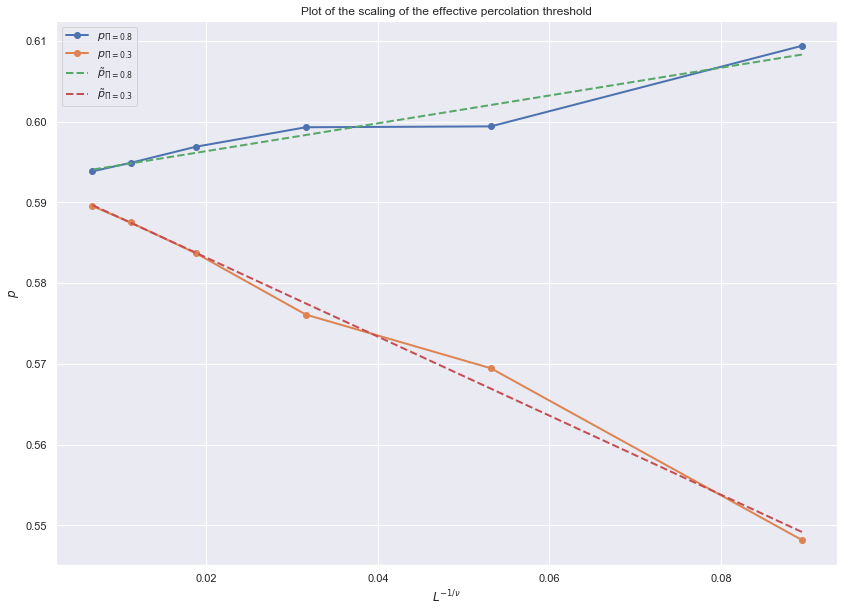

In [15]:
plt.figure(figsize=(14, 10))

L_nu = L_arr ** (-1 / nu_true)

plt.plot(
    L_nu,
    p_pi_high_arr,
    "-o",
    lw=2,
    label=r"$p_{\Pi = 0.8}$"
)
plt.plot(
    L_nu,
    p_pi_low_arr,
    "-o",
    lw=2,
    label=r"$p_{\Pi = 0.3}$"
)

plt.plot(
    L_nu,
    clf_high.predict(L_nu[:, np.newaxis]).ravel(),
    "--",
    lw=2,
    label=r"$\tilde{p}_{\Pi = 0.8}$"
)
plt.plot(
    L_nu,
    clf_low.predict(L_nu[:, np.newaxis]).ravel(),
    "--",
    lw=2,
    label=r"$\tilde{p}_{\Pi = 0.3}$"
)

plt.legend(loc="best")
plt.xlabel(r"$L^{-1/\nu}$")
plt.ylabel(r"$p$")
plt.title(r"Plot of the scaling of the effective percolation threshold")
plt.show()

In the lecture notes we find that we can write the scaling anstatz of the percolation threshold to be
\begin{gather}
    p = p_c + C L^{-1 / \nu}
    \implies
    \left(p - p_c\right) L^{1 / \nu} = C \equiv \Phi^{-1}(x).
\end{gather}
We defined $x$ to be a certain value of $\Pi(p, L)$, that is,
\begin{align}
    x = \Pi(p, L).
\end{align}
Therefore, if we apply the function $\Phi(u)$ on both sides of the former equation, we are left with
\begin{align}
    x = \Pi(p, L) = \Phi\left(
        \left[ p - p_c \right]
        L^{1 / \nu}
    \right).
\end{align}
By plotting $u = \left[ p - p_c \right] L^{1 / \nu}$ versus $\Pi(p, L)$ we find the shape of $\Phi(u)$.

In [16]:
p_arr = np.linspace(0.5, 0.65, 21)
L_new = 2 ** np.arange(4, 9)
M = 100

Pi_arr = np.zeros((len(L_new), len(p_arr)))

In [17]:
for i, L in tqdm.tqdm_notebook(enumerate(L_new), total=len(L_new)):
    for j, p in enumerate(p_arr):
        Pi_arr[i, j] = compute_percolation_probability(L, p, M)

In [18]:
u = np.zeros(Pi_arr.shape)

for i, L in enumerate(L_new):
    u[i] = (p_arr - p_c) * L ** (1 / nu_true)

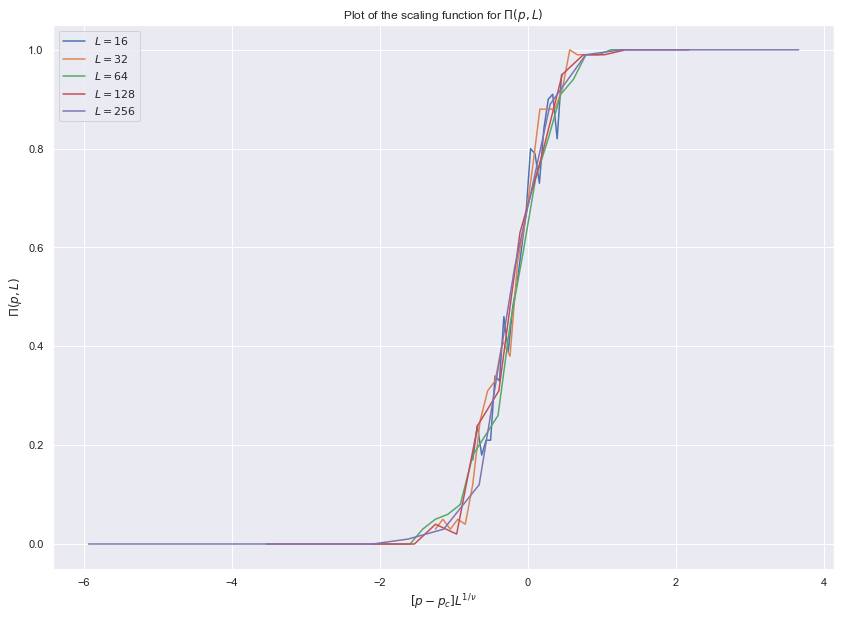

In [19]:
plt.figure(figsize=(14, 10))

for i in range(len(L_new)):
    plt.plot(u[i], Pi_arr[i], label=fr"$L = {L_new[i]}$")

plt.legend(loc="best")
plt.title(r"Plot of the scaling function for $\Pi(p, L)$")
plt.xlabel(r"$\left[p - p_c\right] L^{1 / \nu}$")
plt.ylabel(r"$\Pi(p, L)$")
plt.show()

Here we see how $\Pi(p, L)$ scales as a function of $u = \left[ p - p_c\right] L^{1 / \nu}$. This shape is the same as the function $\Phi(u)$.